In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00


In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import tweepy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
stop = stopwords.words('english')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from matplotlib.cm import Reds, Greens, Purples, Greys
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator

import time
import warnings
warnings.filterwarnings('ignore')

In [5]:

import msAuth as auth
ACCESS_TOKEN = auth.ACCESS_TOKEN
ACCESS_SECRET = auth.ACCESS_SECRET
CONSUMER_KEY = auth.CONSUMER_KEY
CONSUMER_SECRET = auth.CONSUMER_SECRET

In [6]:
def connect_to_twitter_OAuth():
  auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
  auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

  api = tweepy.API(auth)
  return api

api = connect_to_twitter_OAuth()

In [7]:
type(api)

tweepy.api.API

In [8]:
tweets = api.user_timeline(screen_name='@elonmusk', count=20)

In [9]:
tweets[11].text

'@alx Yes'

In [10]:
type(tweets)

tweepy.models.ResultSet

In [11]:
len(tweets)

20

In [12]:
i = 0
for tweet in tweets:
  i += 1
  print(i,':',tweet.text)

1 : @TheBabylonBee @SethDillon 😂
2 : @0xgaut 😂
3 : @andst7 Very important!
4 : @ProjectTXA Gaming replies to generate free advertising will result in account suspension
5 : @lndian_Bronson 💯
6 : @Rainmaker1973 One of the best accounts on this platform!
7 : @rSanti97 !
8 : @TitterDaily @VivaTech Especially in North America
9 : @DimaZeniuk @GiorgiaMeloni @EmmanuelMacron Wonderful meetings with France and Italy. I love your countries!
10 : Great to see so many country and company leaders around the world interacting with people on this platform!

This i… https://t.co/UWACQBdDPC
11 : @JosephJacks_ Regulatory capture is a risk
12 : @alx Yes
13 : @growing_daniel 🤦‍♂️
14 : @BrianRoemmele Wow
15 : @teslaownersSV Exactly
16 : @Teslaconomics 😂
17 : @SmokeAwayyy True
18 : @BillyM2k 😂
19 : @daanksy @dogeofficialceo 😂
20 : @tim_armstrong @Twitter @VivaTech @PublicisGroupe @NancyAArmstrong Bibliothèque de Richelieu avec coeur de Voltaire


In [13]:
crypto_list={'@ethereum','@litecoin','@Tether_to','@dogecoin','@Polkadot','@btc'}

In [14]:
tweeter_list = []

for crypto in crypto_list:
  print('Getting Tweets for :',crypto)

  crypto_tweets = api.user_timeline(screen_name = crypto, count = 300)
  time.sleep(1)

  for tweet in crypto_tweets:
    tweet_id = tweet.id
    text = tweet.text
    favorite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    source = tweet.source
    reply_to_status = tweet.in_reply_to_status_id
    reply_to_user = tweet.in_reply_to_screen_name
    retweets = tweet.retweet_count
    favorite = tweet.favorite_count

    tweeter_list.append({'crypto':crypto,
                         'tweet_id':tweet_id,
                         'text':text,
                         'favorite_count':favorite_count,
                         'retweet_count':retweet_count,
                         'created_at':created_at,
                         'source':source,
                         'reply_to_status':reply_to_status,
                         'reply_to_user':reply_to_user,
                         'retweets':retweets,
                         'favorite':favorite})
print('Done...')

Getting Tweets for : @btc
Getting Tweets for : @ethereum
Getting Tweets for : @Polkadot
Getting Tweets for : @dogecoin
Getting Tweets for : @Tether_to
Getting Tweets for : @litecoin
Done...


In [16]:
tweeter_list[100]

{'crypto': '@btc',
 'tweet_id': 1663967218118393856,
 'text': 'RT @Excellion: Amazed that a decentralized stablecoin can buy T-bills. 😂 https://t.co/E0qT7NR7ef',
 'favorite_count': 0,
 'retweet_count': 51,
 'created_at': datetime.datetime(2023, 5, 31, 17, 54, 34, tzinfo=datetime.timezone.utc),
 'source': 'Twitter for iPhone',
 'reply_to_status': None,
 'reply_to_user': None,
 'retweets': 51,
 'favorite': 0}

In [17]:
tweet_df = pd.DataFrame(tweeter_list)
print(tweet_df.shape)
tweet_df.head()

(1199, 11)


,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorite
0,@btc,1670083888243253248,"""Governments are good at cutting off the heads...",15,5,2023-06-17 15:00:02+00:00,TweetDeck,NaN,None,5,15
1,@btc,1670068788166029312,ICYMI: From educational platforms to grassroot...,10,1,2023-06-17 14:00:02+00:00,TweetDeck,NaN,None,1,10
2,@btc,1669778114896076801,Freedom writer @willms_ dives into how @Robert...,37,8,2023-06-16 18:45:00+00:00,TweetDeck,NaN,None,8,37
3,@btc,1669753779091062784,RT @carlabitcoin: BlackRock wants your #Bitcoi...,0,203,2023-06-16 17:08:18+00:00,Twitter for iPhone,NaN,None,203,0
4,@btc,1669714010747404288,RT @jack: Bitcoin and nostr are the only two t...,0,420,2023-06-16 14:30:16+00:00,Twitter for iPhone,NaN,None,420,0


In [18]:
tweet_df.to_csv('Tweets.csv', index=None)

In [19]:
tweet_df.crypto.value_counts()

@btc          200
@ethereum     200
@dogecoin     200
@Tether_to    200
@litecoin     200
@Polkadot     199
Name: crypto, dtype: int64

In [20]:
source = tweet_df.source.value_counts()
print(source)

Twitter Web App            480
TweetDeck                  321
Hootsuite Inc.             190
Twitter for iPhone         124
Buffer                      76
Twitter for Advertisers      4
Twitter Media Studio         3
Twitter for Android          1
Name: source, dtype: int64


In [21]:
trace = go.Pie(labels=source.index, values = source, showlegend = True, hole = 0.1,
               text = [str(round(i*100,3))+'%' for i in source/sum(source)],
               hovertext = 'Source', hoverinfo = 'label+text', textinfo='text+label')
layout = go.Layout(title = 'Which Device People are using?')
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [22]:
source = tweet_df.groupby('crypto').agg(sum)[['retweet_count', 'favorite_count']]

In [23]:
source

,retweet_count,favorite_count
crypto,,
@Polkadot,6491,28631
@Tether_to,22796,56242
@btc,32579,4428
@dogecoin,212287,578171
@ethereum,56826,8385
@litecoin,19977,80112


In [24]:
fig = go.Figure()
fig.add_bar(x = source.index, y = source.retweet_count, name = 'Retweet Count')
fig.add_bar(x = source.index, y = source.favorite_count, name = 'Favorite Count')

## **Most Used Hashtags**



In [25]:
def hashtags_extracts(x):
  hashtags = []
  ht = re.findall(r'#(\w+)',x)
  hashtags.extend(ht)
  if hashtags == []:
    return ''
  return hashtags

In [26]:
tags = [hashtags_extracts(x) for x in tweet_df.text]
print(len(tags))
print(tags)

1199
['', '', ['Bitcoin'], ['Bitcoin'], '', '', ['Bitcoin'], '', '', ['Bitcoin', 'BTC'], ['startsmall', 'Bitcoin', 'BTC'], ['Bitcoin', 'BTC', 'LightningNetwork'], '', '', ['nos'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', '', '', '', ['Bitcoin'], '', '', '', '', '', '', ['Bitcoin'], '', ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', ['Bitcoin'], '', '', ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', ['Bitcoin'], ['bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', '', ['Bitcoin'], ['BTCPrague'], ['BTC'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', ['Bitcoin'], '', '', '', ['Bitcoin'], '', '', ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', '', ['bitcoin'], ['Gold', 'Bitcoin'], ['Bitcoin'], '', '', ['Bitcoin'], '', '', ['Bitcoin'], '', ['Bitcoin'], '', ['Bitcoin'], ['FreeAssange'], '', '', ['bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', ['Bitcoin'], ['Bitcoin', 'Bitcoin'], ['Bitcoin'], ['Bitcoin'], ['Bitcoin'], '', '', ['Bitcoin'], '', ['bitcoin'], '

In [27]:
all_tags = []
for tag in tags:
  if tag!='':
    all_tags.extend(tag)

In [28]:
len(all_tags)

574

In [29]:
tag_val_count = {tag:0 for tag in set(all_tags)}
tag_val_count

{'PolkadotDigest': 0,
 'PolkadotDeepDive': 0,
 'sundayvibes': 0,
 'TeamSeas': 0,
 'MayThe4thBeWithYou': 0,
 'Polkad': 0,
 'DogeNodes': 0,
 'ParisBlockchain': 0,
 'KuCoin': 0,
 'crypto': 0,
 'cryptocurrencies': 0,
 'dogeart': 0,
 'memes': 0,
 'GitHub': 0,
 'PolkadotDeepDives': 0,
 'ama': 0,
 'dogefam': 0,
 'PaywithLitecoin': 0,
 'BearNecessitiesHackathon': 0,
 'BNB': 0,
 'EVM': 0,
 'HiJustinG': 0,
 'TheMandalorian': 0,
 'BitfinexTalks': 0,
 'tether': 0,
 'tesla': 0,
 'bitcoin': 0,
 'LuganoPlanB': 0,
 'doge': 0,
 '6': 0,
 'DeFi': 0,
 'LITECOIN': 0,
 'SundayFunday': 0,
 'dogecar': 0,
 'USDT': 0,
 'FreeAssange': 0,
 'Crypto': 0,
 'Reckless': 0,
 'TheFlash': 0,
 'LTC': 0,
 'dogecoin': 0,
 'CryptoNews': 0,
 'ApexLedgends': 0,
 'TheNewsCrypto': 0,
 '60DaysOfPolkadot': 0,
 'Gasper': 0,
 'TheFlashMovie': 0,
 'Bitfinex': 0,
 'lugano': 0,
 'blockchainsecurity': 0,
 'Ethereum': 0,
 'HackTheDoge': 0,
 'tethergold': 0,
 'Gold': 0,
 'libdogecoin': 0,
 'Bitcoin': 0,
 'Hashrate': 0,
 'cryptoinvesting':

In [30]:
for tweet in tweet_df.text:
  ht = re.findall(r"#(\w+)", tweet)
  if ht != []:
    for tag in ht:
      tag_val_count[tag]+=1
tag_val_count

{'PolkadotDigest': 22,
 'PolkadotDeepDive': 4,
 'sundayvibes': 1,
 'TeamSeas': 1,
 'MayThe4thBeWithYou': 1,
 'Polkad': 1,
 'DogeNodes': 1,
 'ParisBlockchain': 1,
 'KuCoin': 1,
 'crypto': 10,
 'cryptocurrencies': 2,
 'dogeart': 1,
 'memes': 1,
 'GitHub': 1,
 'PolkadotDeepDives': 1,
 'ama': 1,
 'dogefam': 1,
 'PaywithLitecoin': 4,
 'BearNecessitiesHackathon': 1,
 'BNB': 1,
 'EVM': 1,
 'HiJustinG': 1,
 'TheMandalorian': 1,
 'BitfinexTalks': 2,
 'tether': 21,
 'tesla': 1,
 'bitcoin': 16,
 'LuganoPlanB': 3,
 'doge': 2,
 '6': 2,
 'DeFi': 2,
 'LITECOIN': 5,
 'SundayFunday': 1,
 'dogecar': 1,
 'USDT': 4,
 'FreeAssange': 1,
 'Crypto': 1,
 'Reckless': 1,
 'TheFlash': 1,
 'LTC': 6,
 'dogecoin': 12,
 'CryptoNews': 1,
 'ApexLedgends': 1,
 'TheNewsCrypto': 1,
 '60DaysOfPolkadot': 2,
 'Gasper': 1,
 'TheFlashMovie': 1,
 'Bitfinex': 1,
 'lugano': 1,
 'blockchainsecurity': 1,
 'Ethereum': 10,
 'HackTheDoge': 3,
 'tethergold': 1,
 'Gold': 1,
 'libdogecoin': 1,
 'Bitcoin': 118,
 'Hashrate': 1,
 'cryptoinv

In [31]:
tags_val_count_sorted = dict(sorted(tag_val_count.items(), key = lambda x: x[1], reverse = True))
tags_val_count_sorted

{'Bitcoin': 118,
 'Litecoin': 50,
 'Dogecoin': 37,
 'Tether': 37,
 'PolkadotDigest': 22,
 'Polkadot': 22,
 'tether': 21,
 'bitcoin': 16,
 'BTC': 14,
 'dogecoin': 12,
 'crypto': 10,
 'Ethereum': 10,
 'MWEB': 9,
 'PolkadotCommunityCall': 8,
 'LTC': 6,
 'PolkadotDecoded': 6,
 'Doge': 6,
 'LITECOIN': 5,
 'PolkadotDeepDive': 4,
 'PaywithLitecoin': 4,
 'USDT': 4,
 'DogeFam': 4,
 'Dogeathon': 4,
 'DoOnlyGoodEveryday': 4,
 'KeepDogeAbsurd': 4,
 'LuganoPlanB': 3,
 'HackTheDoge': 3,
 'LightningNetwork': 3,
 'HongKong': 3,
 'AllCoreDevs': 3,
 'cryptocurrencies': 2,
 'BitfinexTalks': 2,
 'doge': 2,
 '6': 2,
 'DeFi': 2,
 '60DaysOfPolkadot': 2,
 'Bitcoin2023': 2,
 'DOGE': 2,
 'PolkadotRoundup': 2,
 'DogecoinToTheMoon': 2,
 'dogearmy': 2,
 'ACDE': 2,
 'TwitterSpaces': 2,
 'DogeSwag': 2,
 'sundayvibes': 1,
 'TeamSeas': 1,
 'MayThe4thBeWithYou': 1,
 'Polkad': 1,
 'DogeNodes': 1,
 'ParisBlockchain': 1,
 'KuCoin': 1,
 'dogeart': 1,
 'memes': 1,
 'GitHub': 1,
 'PolkadotDeepDives': 1,
 'ama': 1,
 'dogefam'

## **Cleaning the Tweets**

In [32]:
tweet_data = tweet_df.copy()
tweet_data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorite
0,@btc,1670083888243253248,"""Governments are good at cutting off the heads...",15,5,2023-06-17 15:00:02+00:00,TweetDeck,NaN,None,5,15
1,@btc,1670068788166029312,ICYMI: From educational platforms to grassroot...,10,1,2023-06-17 14:00:02+00:00,TweetDeck,NaN,None,1,10
2,@btc,1669778114896076801,Freedom writer @willms_ dives into how @Robert...,37,8,2023-06-16 18:45:00+00:00,TweetDeck,NaN,None,8,37
3,@btc,1669753779091062784,RT @carlabitcoin: BlackRock wants your #Bitcoi...,0,203,2023-06-16 17:08:18+00:00,Twitter for iPhone,NaN,None,203,0
4,@btc,1669714010747404288,RT @jack: Bitcoin and nostr are the only two t...,0,420,2023-06-16 14:30:16+00:00,Twitter for iPhone,NaN,None,420,0


In [33]:
tweet_data['clean_text'] = tweet_data['text'].replace(to_replace = '(@[\w]+)', value = '', regex = True)
tweet_data['clean_text'] = tweet_data['clean_text'].replace(to_replace = ('RT'), value = '', regex = True)


In [34]:
print('Text before cleaning:')
tweet_data['text'][:10]

Text before cleaning:


0    "Governments are good at cutting off the heads...
1    ICYMI: From educational platforms to grassroot...
2    Freedom writer @willms_ dives into how @Robert...
3    RT @carlabitcoin: BlackRock wants your #Bitcoi...
4    RT @jack: Bitcoin and nostr are the only two t...
5    RT @Excellion: Coffee in [REDACTED] 😉 https://...
6    RT @saylor: #Bitcoin is a Natural Right. https...
7    RT @DocumentingBTC: How it started:           ...
8                                   RT @Excellion: 🇲🇪👀
9    The world's largest asset manager, @BlackRock,...
Name: text, dtype: object

In [35]:
print("Text after Cleaning:")
tweet_data['clean_text'][:10]

Text after Cleaning:


0    "Governments are good at cutting off the heads...
1    ICYMI: From educational platforms to grassroot...
2    Freedom writer  dives into how 's support for ...
3     : BlackRock wants your #Bitcoin https://t.co/...
4     : Bitcoin and nostr are the only two truly ce...
5     : Coffee in [REDACTED] 😉 https://t.co/vA9Rmw6ftf
6     : #Bitcoin is a Natural Right. https://t.co/E...
7     : How it started:                       How i...
8                                                : 🇲🇪👀
9    The world's largest asset manager, , is gearin...
Name: clean_text, dtype: object

# **Removing any links from the text**

In [36]:
tweet_data['clean_text'] = tweet_data['clean_text'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0', regex = True)

In [37]:
print("Before removing sites or links from text")
tweet_data['text'][:10]


Before removing sites or links from text


0    "Governments are good at cutting off the heads...
1    ICYMI: From educational platforms to grassroot...
2    Freedom writer @willms_ dives into how @Robert...
3    RT @carlabitcoin: BlackRock wants your #Bitcoi...
4    RT @jack: Bitcoin and nostr are the only two t...
5    RT @Excellion: Coffee in [REDACTED] 😉 https://...
6    RT @saylor: #Bitcoin is a Natural Right. https...
7    RT @DocumentingBTC: How it started:           ...
8                                   RT @Excellion: 🇲🇪👀
9    The world's largest asset manager, @BlackRock,...
Name: text, dtype: object

In [38]:
print('After Removing sites or links from text')
tweet_data['clean_text'][:10]

After Removing sites or links from text


0    "Governments are good at cutting off the heads...
1    ICYMI: From educational platforms to grassroot...
2    Freedom writer  dives into how 's support for ...
3                    : BlackRock wants your #Bitcoin  
4     : Bitcoin and nostr are the only two truly ce...
5                           : Coffee in [REDACTED] 😉  
6                     : #Bitcoin is a Natural Right.  
7     : How it started:                       How i...
8                                                : 🇲🇪👀
9    The world's largest asset manager, , is gearin...
Name: clean_text, dtype: object

In [39]:
tweet_data['clean_text'] = tweet_data['clean_text'].str.replace('[^\sa-zA-Z]+','')

In [40]:
tweet_data[['clean_text','text']][:10]

,clean_text,text
0,Governments are good at cutting off the heads ...,"""Governments are good at cutting off the heads..."
1,ICYMI From educational platforms to grassroots...,ICYMI: From educational platforms to grassroot...
2,Freedom writer dives into how s support for B...,Freedom writer @willms_ dives into how @Robert...
3,BlackRock wants your Bitcoin,RT @carlabitcoin: BlackRock wants your #Bitcoi...
4,Bitcoin and nostr are the only two truly cen...,RT @jack: Bitcoin and nostr are the only two t...
5,Coffee in REDACTED,RT @Excellion: Coffee in [REDACTED] 😉 https://...
6,Bitcoin is a Natural Right,RT @saylor: #Bitcoin is a Natural Right. https...
7,How it started How its...,RT @DocumentingBTC: How it started: ...
8,,RT @Excellion: 🇲🇪👀
9,The worlds largest asset manager is gearing u...,"The world's largest asset manager, @BlackRock,..."


# **Tokenising and Removing Stop Words**

In [41]:
tweet_data['clean_text'] = tweet_data['clean_text'].str.lower()
tweet_data['clean_text'] = tweet_data['clean_text'].str.split()
tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda x: [item for item in x if item not in stop])

In [42]:
tweet_data[['clean_text','text']][:10]

,clean_text,text
0,"[governments, good, cutting, heads, centrally,...","""Governments are good at cutting off the heads..."
1,"[icymi, educational, platforms, grassroots, ad...",ICYMI: From educational platforms to grassroot...
2,"[freedom, writer, dives, support, bitcoin, pla...",Freedom writer @willms_ dives into how @Robert...
3,"[blackrock, wants, bitcoin]",RT @carlabitcoin: BlackRock wants your #Bitcoi...
4,"[bitcoin, nostr, two, truly, censorship, resis...",RT @jack: Bitcoin and nostr are the only two t...
5,"[coffee, redacted]",RT @Excellion: Coffee in [REDACTED] 😉 https://...
6,"[bitcoin, natural, right]",RT @saylor: #Bitcoin is a Natural Right. https...
7,"[started, going]",RT @DocumentingBTC: How it started: ...
8,[],RT @Excellion: 🇲🇪👀
9,"[worlds, largest, asset, manager, gearing, sub...","The world's largest asset manager, @BlackRock,..."


In [43]:
def join_words(row):
  my_list = row['clean_text']
  joined_words = ' '.join(my_list)
  return joined_words
tweet_data['clean_text'] = tweet_data.apply(join_words,axis = 1)

# Using SentimentIntensityAnalyzer

In [44]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores('the tweet is not very good')

{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'compound': -0.3865}

In [45]:
print(tweet_data['text'][0])
analyzer.polarity_scores(tweet_data['text'][0])

"Governments are good at cutting off the heads of centrally controlled networks like Napster, but pure P2P networks… https://t.co/ibR8Iw5M9Y


{'neg': 0.06, 'neu': 0.764, 'pos': 0.177, 'compound': 0.3506}

In [46]:
print(tweet_data['clean_text'][0])
analyzer.polarity_scores(tweet_data['clean_text'][0])

governments good cutting heads centrally controlled networks like napster pure pp networks


{'neg': 0.094, 'neu': 0.566, 'pos': 0.34, 'compound': 0.5994}

In [47]:
out = {'neg':[], 'neu':[], 'pos':[], 'compound':[]}
for i in range(tweet_data.shape[0]):
  vader_out = analyzer.polarity_scores(tweet_data['clean_text'][i])
  for key in vader_out.keys():
    out[key].append(vader_out[key])

In [48]:
for key in out.keys():
  tweet_data[key] = out[key]

In [49]:
tweet_data[['text','clean_text','neg','neu','pos','compound']][:10]

,text,clean_text,neg,neu,pos,compound
0,"""Governments are good at cutting off the heads...",governments good cutting heads centrally contr...,0.094,0.566,0.340,0.5994
1,ICYMI: From educational platforms to grassroot...,icymi educational platforms grassroots adoptio...,0.000,0.776,0.224,0.3818
2,Freedom writer @willms_ dives into how @Robert...,freedom writer dives support bitcoin plays pol...,0.000,0.360,0.640,0.8360
3,RT @carlabitcoin: BlackRock wants your #Bitcoi...,blackrock wants bitcoin,0.000,1.000,0.000,0.0000
4,RT @jack: Bitcoin and nostr are the only two t...,bitcoin nostr two truly censorship resistant t...,0.000,0.707,0.293,0.4404
5,RT @Excellion: Coffee in [REDACTED] 😉 https://...,coffee redacted,0.000,1.000,0.000,0.0000
6,RT @saylor: #Bitcoin is a Natural Right. https...,bitcoin natural right,0.000,0.444,0.556,0.3612
7,RT @DocumentingBTC: How it started: ...,started going,0.000,1.000,0.000,0.0000
8,RT @Excellion: 🇲🇪👀,,0.000,0.000,0.000,0.0000
9,"The world's largest asset manager, @BlackRock,...",worlds largest asset manager gearing submit ap...,0.000,0.783,0.217,0.3612


In [59]:
source = tweet_data.groupby('crypto').agg('mean')
source[['neg','neu','pos']]

,neg,neu,pos
crypto,,,
@Polkadot,0.018111,0.823035,0.148809
@Tether_to,0.027760,0.795495,0.156740
@btc,0.058425,0.725940,0.205645
@dogecoin,0.021645,0.572865,0.280500
@ethereum,0.024570,0.791170,0.184250
@litecoin,0.015990,0.828260,0.120740


In [51]:
list(source[source.index == '@btc'][out.keys()].values[0])

[0.058425000000000005, 0.7259399999999999, 0.205645, 0.17959250000000002]

In [52]:
tweet_data.crypto.unique()

array(['@btc', '@ethereum', '@Polkadot', '@dogecoin', '@Tether_to',
       '@litecoin'], dtype=object)

In [53]:
fig = go.Figure()
for crypto in source.index:
  fig.add_bar(x = ['Negative','Neutral','positive','compound'], y = list(source[source.index == crypto][out.keys()].values[0]),name = crypto)
fig.update_layout(title = 'Average Sentiment across type of cryptocurrencies')
fig.show()

In [54]:
source.columns


Index(['tweet_id', 'favorite_count', 'retweet_count', 'reply_to_status',
       'retweets', 'favorite', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [55]:
tweet_data.crypto.unique()

array(['@btc', '@ethereum', '@Polkadot', '@dogecoin', '@Tether_to',
       '@litecoin'], dtype=object)

# Wordcloud Based on Hashtags

In [60]:
def word_cloud(wd_list,color):
    plt.figure(figsize=(10,15))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(max_font_size=None,stopwords=stopwords, background_color='#fcf4ee', collocations=False,colormap =color,
                  width=750, height=750).generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

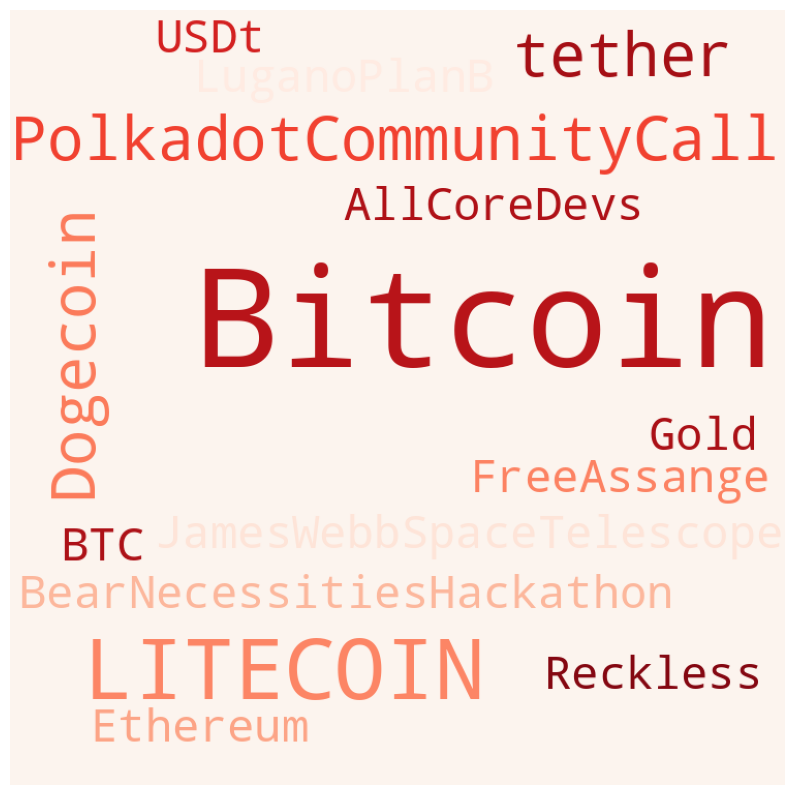

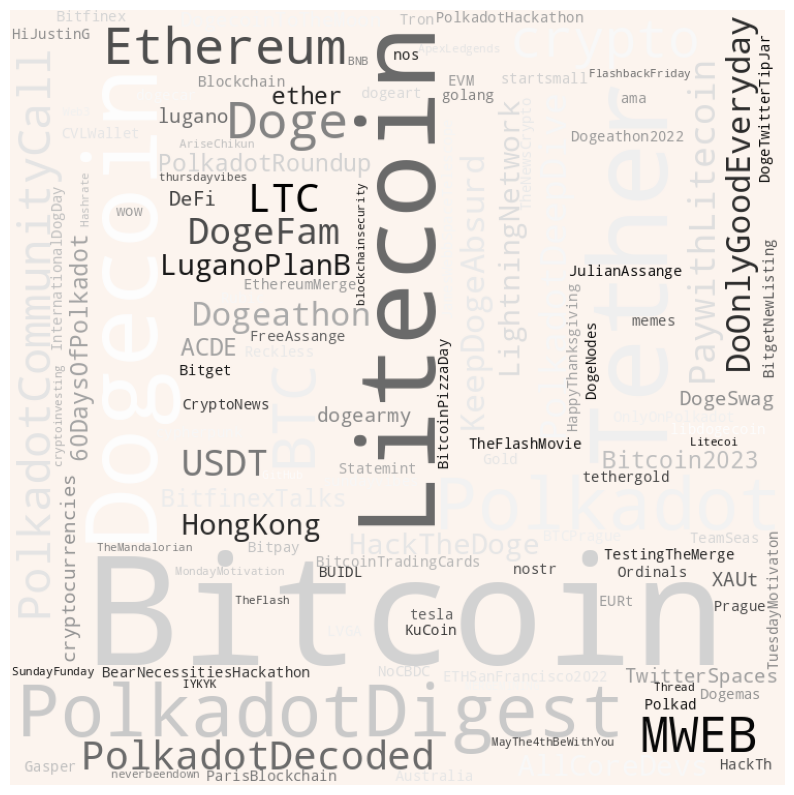

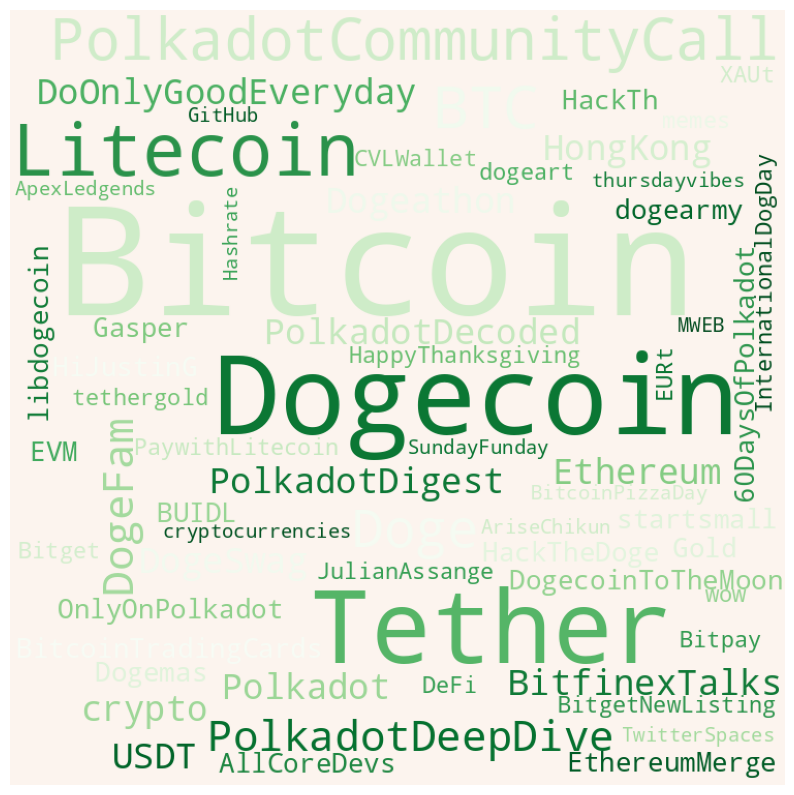

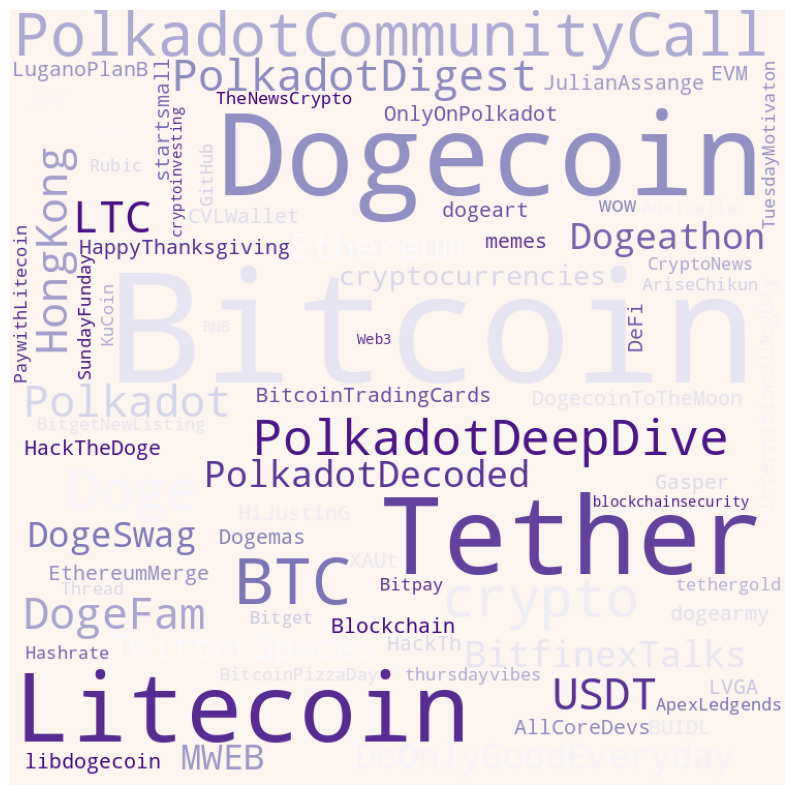

In [57]:
for key in out.keys():
    pos_tags = tweet_data['text'][tweet_data[key]>0.2].apply(hashtags_extracts)
    sentiment_tags=[]
    for tag in pos_tags:
        if tag!='':
            sentiment_tags.extend(tag)
    color={'neg':Reds,'pos':Greens,'neu':Greys,'compound':Purples}
    word_cloud(sentiment_tags,color[key])